# Recurrent Neural Network

### Importing the libraries

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [22]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [23]:
dataset = pd.read_csv('../saved_data/bird_migration.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [24]:
dataset.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [27]:
dataset.groupby(['bird_name']).mean()

,Unnamed: 0,altitude,device_info_serial,direction,latitude,longitude,speed_2d
bird_name,,,,,,,
Eric,9897.0,60.249406,851.0,-7.774162,39.055123,-4.409152,2.300545
Nico,30355.0,67.900478,864.0,-4.074570,31.084068,-8.311241,2.908726
Sanne,51417.5,29.159922,833.0,-2.150073,21.047431,-13.881717,2.450434


In [31]:
dataset_eric = dataset.loc[dataset['bird_name'] == 'Eric']
dataset_eric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19795 entries, 0 to 19794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          19795 non-null  int64  
 1   altitude            19795 non-null  int64  
 2   date_time           19795 non-null  object 
 3   device_info_serial  19795 non-null  int64  
 4   direction           19710 non-null  float64
 5   latitude            19795 non-null  float64
 6   longitude           19795 non-null  float64
 7   speed_2d            19710 non-null  float64
 8   bird_name           19795 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


In [32]:
dataset_nico = dataset.loc[dataset['bird_name'] == 'Nico']
dataset_nico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21121 entries, 19795 to 40915
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21121 non-null  int64  
 1   altitude            21121 non-null  int64  
 2   date_time           21121 non-null  object 
 3   device_info_serial  21121 non-null  int64  
 4   direction           21008 non-null  float64
 5   latitude            21121 non-null  float64
 6   longitude           21121 non-null  float64
 7   speed_2d            21008 non-null  float64
 8   bird_name           21121 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.6+ MB


In [33]:
dataset_sanne = dataset.loc[dataset['bird_name'] == 'Sanne']
dataset_sanne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21004 entries, 40916 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21004 non-null  int64  
 1   altitude            21004 non-null  int64  
 2   date_time           21004 non-null  object 
 3   device_info_serial  21004 non-null  int64  
 4   direction           20759 non-null  float64
 5   latitude            21004 non-null  float64
 6   longitude           21004 non-null  float64
 7   speed_2d            20759 non-null  float64
 8   bird_name           21004 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.6+ MB


In [35]:
list_of_birds = [dataset_eric, dataset_nico, dataset_sanne]

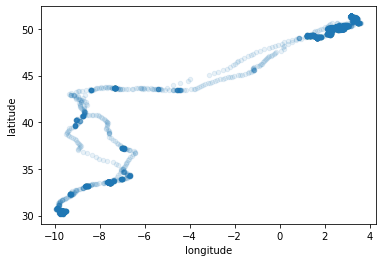

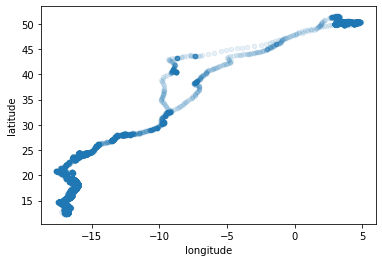

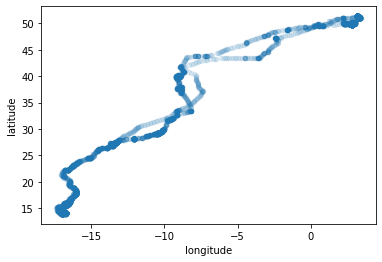

In [37]:
for i in range(0, len(list_of_birds)):
    current_bird = list_of_birds[i]
    current_bird.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [49]:
coord_eric = dataset_eric[["latitude", "longitude"]]
coord_eric.head()

,latitude,longitude
0,49.419860,2.120733
1,49.419880,2.120746
2,49.420310,2.120885
3,49.420359,2.120859
4,49.420331,2.120887


### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2]) # female --> 0, male --> 1

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
# Detect number of countries found in the dataset --> three countries France/Germany/Spain
countries = dataset.groupby(['Geography']).mean()
countries

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Fance    --> 1.0 0.0 0.0
# Spain    --> 0.0 1.0 0.0
# Germany  --> 0.0 0.0 1.0
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [12]:
dataset_prep = pd.DataFrame(X)
dataset_prep

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [13]:
column_names = [    
    'France',
    'Spain',
    'Gernamy',
    'CreditScor', 
    'Gender', 
    'Age', 
    'Tenure', 
    'Balance', 
    'NumOfProducts', 
    'HasCrCard', 
    'IsActiveMember', 
    'EstimatedSalary'
]

In [14]:
dataset_prep.columns = column_names
dataset_prep.head()

,France,Spain,Gernamy,CreditScor,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1


In [15]:
dataset_prep  = dataset_prep.assign(Exited = y)
dataset_prep.head()

,France,Spain,Gernamy,CreditScor,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1,0


### Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [18]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [23]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5578 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4316 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8044
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8091
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8133
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3874 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [24]:
'''
TEST_CUSTOMER_1
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000

TEST_CUSTOMER_2
Geography: Germany
Credit Score: 645
Gender: Male
Age: 44 years old
Tenure: 8 years
Balance: $ 113755.78
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: No
Estimated Salary: $ 149756.71

Exited: 1


0.0,0.0,1.0,645,1,44,8,113755.78,2,1,0,149756.71,1
0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0

0.0,0.0,1.0,510,0,38,4,0.0,1,1,0,118913.53,1
1.0,0.0,0.0,669,1,46,3,0.0,2,0,1,8487.75,0
1.0,0.0,0.0,846,0,38,5,0.0,1,1,1,187616.16,0

Should we say goodbye to that customer ?
'''
TEST_CUSTOMER_1 = [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
TEST_CUSTOMER_2 = [[0, 0, 1, 645, 1, 44, 8, 113755, 2, 1, 0, 149756]]
TEST_CUSTOMER_3 = [[0, 0, 1, 608, 0, 41, 1, 83807, 1, 0, 1, 112542]]
TEST_CUSTOMER_4 = [[0, 0, 1, 510, 0, 38, 4, 83807, 0, 1, 1, 118913]]

customer_names = [
    'TEST_CUSTOMER_1',
    'TEST_CUSTOMER_2',
    'TEST_CUSTOMER_3',
    'TEST_CUSTOMER_4'
    ]

customer_data = [
    TEST_CUSTOMER_1,
    TEST_CUSTOMER_2,
    TEST_CUSTOMER_3,
    TEST_CUSTOMER_4
    ]

In [25]:
for i in range(0, len(customer_data)):
    result = ann.predict(scaler.transform(customer_data[i])).reshape(-1, 1)
    #result_inv = scaler.inverse_transform(result)
    print('--- Result for customer ' + customer_names[i] + ' ---')
    print(result)
    print(result > 0.5)

--- Result for customer TEST_CUSTOMER_1 ---
[[0.03695932]]
[[False]]
--- Result for customer TEST_CUSTOMER_2 ---
[[0.27669218]]
[[False]]
--- Result for customer TEST_CUSTOMER_3 ---
[[0.21942659]]
[[False]]
--- Result for customer TEST_CUSTOMER_4 ---
[[0.3803086]]
[[False]]


In [26]:
result = ann.predict(scaler.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
result

array([[0.03695932]], dtype=float32)

In [27]:
print(ann.predict(scaler.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


--> ANN model predicts that this customer stays in the bank!

### Predicting the Test set results

In [28]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print()
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm) 
print()
print('Description Confusion Matrix:')
print('[Predicted POSITIVE and real POSITIVE][Predicted positive and real negative]')
print('[Predicted negative and real positive][Predicted NEGATIVE and real NEGATIVE]')  
print()
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[1505   90]
 [ 192  213]]

Description Confusion Matrix:
[Predicted POSITIVE and real POSITIVE][Predicted positive and real negative]
[Predicted negative and real positive][Predicted NEGATIVE and real NEGATIVE]

Accuracy Score:
0.859
